In [5]:
import pandas as pd
stock_data = pd.read_csv('./AAPL.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.275651,807234400
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.282348,619603600
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.264388,449422400
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.322839,704457600
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.315227,675040800


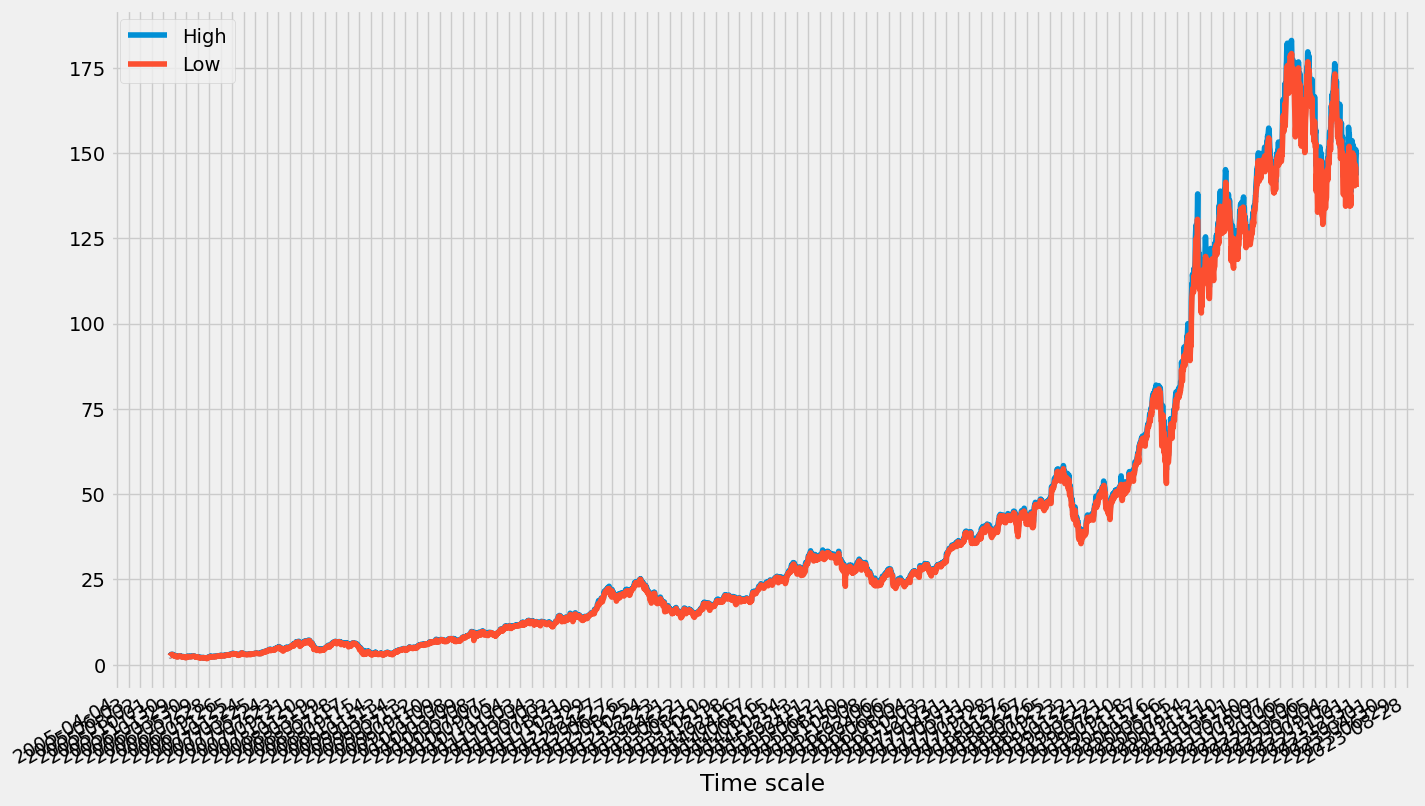

In [6]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label = 'High')
plt.plot(x_dates, stock_data['Low'], label = 'Low')
plt.xlabel('Time scale')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label = 'High')
plt.plot(x_dates, stock_data['Low'], label = 'Low')
plt.xlabel('Time scale')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [28]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]

In [29]:
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,
                    data=X_ft,
                    index=X_feat.index)

In [33]:
def lstm_split(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps-1, -1])
        
    return np.array(X), np.array(y)

In [34]:
X1, y1 = lstm_split(stock_data.values, n_steps=2)

train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1.shape, X_train.shape, X_test.shape, y_test.shape)


(756, 2, 5) (605, 2, 5) (151, 2, 5) (151,)


In [35]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu',
              return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

2022-12-11 22:57:06.616057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 32)             4864      
                                                                 
 dense (Dense)               (None, 2, 1)              33        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [36]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
152/152 - 4s - loss: 58227051986944.0000 - 4s/epoch - 27ms/step
Epoch 2/100
152/152 - 0s - loss: 58196693614592.0000 - 434ms/epoch - 3ms/step
Epoch 3/100
152/152 - 0s - loss: 58110999789568.0000 - 456ms/epoch - 3ms/step
Epoch 4/100
152/152 - 0s - loss: 57944016158720.0000 - 425ms/epoch - 3ms/step
Epoch 5/100
152/152 - 0s - loss: 57672837627904.0000 - 426ms/epoch - 3ms/step
Epoch 6/100
152/152 - 0s - loss: 57281274183680.0000 - 401ms/epoch - 3ms/step
Epoch 7/100
152/152 - 0s - loss: 56758772957184.0000 - 442ms/epoch - 3ms/step
Epoch 8/100
152/152 - 0s - loss: 56101772984320.0000 - 490ms/epoch - 3ms/step
Epoch 9/100
152/152 - 0s - loss: 55313092837376.0000 - 472ms/epoch - 3ms/step
Epoch 10/100
152/152 - 0s - loss: 54401687355392.0000 - 436ms/epoch - 3ms/step
Epoch 11/100
152/152 - 0s - loss: 53382119161856.0000 - 397ms/epoch - 3ms/step
Epoch 12/100
152/152 - 0s - loss: 52273744969728.0000 - 444ms/epoch - 3ms/step
Epoch 13/100
152/152 - 0s - loss: 51099801223168.0000 - 441ms/e

In [37]:
y_pred = lstm.predict(X_test)

5/5 [==============================] - 1s 3ms/step


In [51]:


print(y_test)
print(X_test)
""" plt.plot(x_dates, y_pred, label = 'lstm predected close price')
plt.plot(x_dates, y_test, label = 'Real close price')
plt.xlabel('Time scale')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show() """

[ 2390500.  1736000.  2537100.  2096600.  2579400.  2039400.  2556700.
  1919800.  1367800.  1960500.  1673900.  1685700.  2177700.  2032800.
  2309800.  2582000.  7497300.  3776400.  2602000.  2109500.  2065600.
  1595500.  3252600.  2434800.  2431900.  5626200.  6179900.  2681200.
  5821400.  5424500.  2954200.  3950800.  3062900.  3457000.  2755600.
  1832000.  4145100.  3732200.  2250900.  4021800.  2526200.  2126200.
  2504700.  4431100.  6221000.  6612600.  4090800.  4995900.  9534300.
  4580400.  3556900.  3272100.  2862500.  3227300.  2420300.  2671700.
  4116900.  4669100.  7633100. 10622000.  8437100.  6186000.  3833500.
  2904800.  2276900.  2859400.  3825300.  3110900.  3888600.  2334900.
  4865000.  5283500.  2887500.  2415600.  2405800.  2868300.  4198400.
  2872200.  2077400.  2732800.  2012900.  2613700.  2764400.  2320200.
  1867300.  2872500.  2529400.  5608900.  3882800.  3331100.  4829300.
  3075700.  3125200.  2220300.  2376300.  2748800.  2517900.  2984500.
  2866

" plt.plot(x_dates, y_pred, label = 'lstm predected close price')\nplt.plot(x_dates, y_test, label = 'Real close price')\nplt.xlabel('Time scale')\nplt.legend()\nplt.gcf().autofmt_xdate()\nplt.show() "